In [37]:
import numpy as np

# read file myspace.csv, of the format '2004-01-04 - 2004-01-10,0'
with open('myspace.csv') as f:
    lines = f.readlines()

hs = []
for line in lines:
    date, value = line[:-1].split(',')
    hs.append(int(value))
ts = list(range(1, len(hs) + 1))

Text(0.5, 1.0, 'MySpace data')

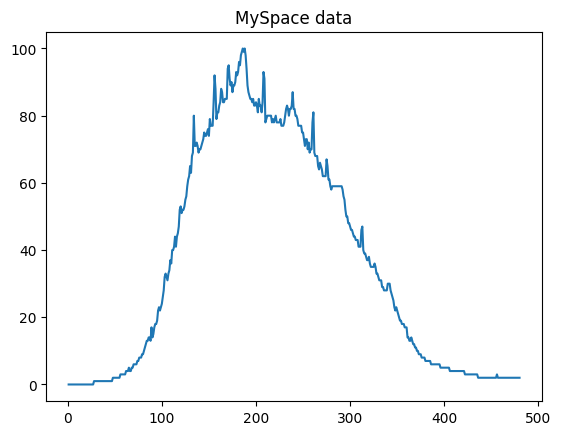

In [38]:
import matplotlib.pyplot as plt

plt.plot(ts, hs)
plt.title('MySpace data')

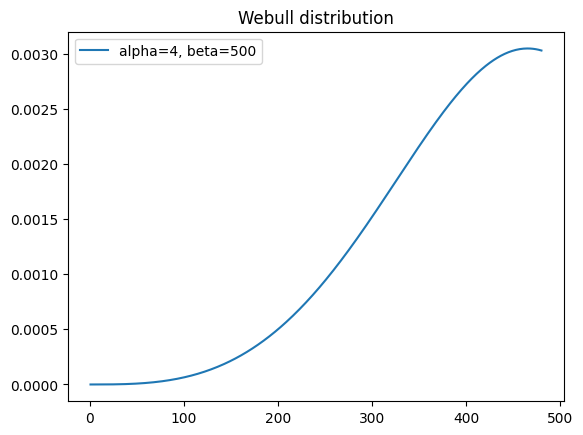

In [39]:
def webull(t, alpha, beta):
    return (alpha/beta) * (t/beta)**(alpha-1) * np.exp(-(t/beta)**alpha)

plt.plot(ts, webull(np.array(ts), 4, 500), label='alpha=4, beta=500')
plt.title('Webull distribution')
plt.legend()

In [42]:
from scipy.optimize import curve_fit

def webull_scaled(t, alpha, beta, scale):
    return scale * webull(t, alpha, beta)

popt, pcov = curve_fit(webull_scaled, ts, hs, p0=[1, 1, 1000])

print('Best fit parameters: alpha={}, beta={}, scale={}'.format(*popt))

Best fit parameters: alpha=1.0000000015705315, beta=1.0000000036001024, scale=-3.915618094652018e-06


Text(0.5, 1.0, 'MySpace data and best fit')

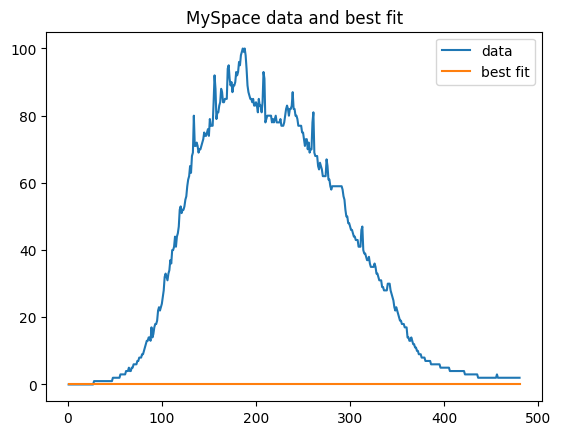

In [43]:
# plot the data and best fit
plt.plot(ts, hs, label='data')
plt.plot(ts, webull_scaled(np.array(ts), *popt), label='best fit')
plt.legend()
plt.title('MySpace data and best fit')

Fitting got stuck in the local minimum, let's try different initialization

In [44]:
popt, pcov = curve_fit(webull_scaled, ts, hs, p0=[4, 500, 1000])

print('Best fit parameters: alpha={}, beta={}, scale={}'.format(*popt))

Best fit parameters: alpha=3.110238419609487, beta=237.04964660784293, scale=17503.7754032124


C:\Users\Алексей\AppData\Local\Temp\ipykernel_24912\239882641.py:2: RuntimeWarning: overflow encountered in power
  return (alpha/beta) * (t/beta)**(alpha-1) * np.exp(-(t/beta)**alpha)
C:\Users\Алексей\AppData\Local\Temp\ipykernel_24912\239882641.py:2: RuntimeWarning: invalid value encountered in multiply
  return (alpha/beta) * (t/beta)**(alpha-1) * np.exp(-(t/beta)**alpha)
C:\Users\Алексей\AppData\Local\Temp\ipykernel_24912\239882641.py:2: RuntimeWarning: invalid value encountered in power
  return (alpha/beta) * (t/beta)**(alpha-1) * np.exp(-(t/beta)**alpha)


Text(0.5, 1.0, 'MySpace data and best fit with better initial guess')

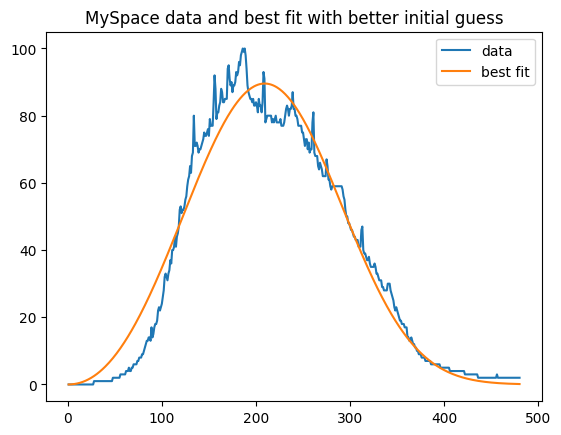

In [45]:
# plot the data and best fit
plt.plot(ts, hs, label='data')
plt.plot(ts, webull_scaled(np.array(ts), *popt), label='best fit')
plt.legend()
plt.title('MySpace data and best fit with better initial guess')